[chloeuhls.github.io](https://chloeu99.github.io/)

Data Science Final Tutorial
Jacob Waxman and Chloe Uhls

# Analysis Of Homelessness In The United States

### Introduction

For our final tutorial we will be analyzing homelessness in the United States. We are diving into the current state of homelessness, the change over time, and factors that have the biggest impact on homelessness. Furthermore, we will break down our analysis on a national level and at the state level, highlighting the observations we find in Louisiana. Stats that we will be looking for include total homeless population, rate of homelessness, the population demographics. We will also look for variables correlating with the rate of homelessness at the state level. These factors will include geographic location, local politics, and minimum wage. 

We will divide our analysis into 3 parts.

#### 1. National Observations - Analyzing Key Homeless Statistics 

#### 2. Regional Impacts - Analyzing On A State-By-State Basis, Highlighting Louisiana, And Finding Correlated Variables 

#### 3. Future Projections - Predicting The State Of Homelessness in 2021 and Beyond

### Collaboration Plan

Throughout the semester we will be meeting twice a week to work on our project. We will meet virtually via Zoom and in person depending on the week. We have a Github repository (https://github.com/chloeu99/chloeu99.github.io) to collaborate and save our coding progress. We use Google Docs for written reports, then upload it to Github to keep everything organized. In terms of coding, we will use the same strategies that we learned in class: Python coding and data scraping and the pandas library for analysis.

### Datasets Used

#### 1. 2020 PIT Estimates by State from HUD exchange                                                         

Link: https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-state.xlsx

This data was really exciting to find. The HUD does a great job posting their records on a yearly basis. We downloaded the excel sheet and uploaded it to our public Github. The spreadsheet breaks homelessness down into specific categories including total homelessness by state, demographics, and status of homeless citizens (sheltered, unsheltered, etc). 

Example Questions: How many people are homeless in Louisiana? Is one gender or one race more likely to be homeless on a national level?


#### 2. Minnimum Wage By State (2021)

Link: https://minimumwage.com/in-your-state/

This data contains a table of each state and their minnimum wage. The federal minimum wage has been stagnent at $7.25 since 2009. Not all states have required a higher state-wide minimum wage, but we expect that those with their own regulations will have a lower homeless population.

Example Questions: Is there a correlation between a state's minimum wage and homeless population?

#### 3. Electoral College Results By State (1980-2020)

Link: https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state

We went to Wikipedia to find the state-wide Electoral College results for Presidential Elections. We will be analyzing election results from 1980 to 2020, and will look to see if a state's political consciounce is correlated with its homeless population.

Example Questions: Is there any correlation between a states politics and homeless population? How has national homeless changed as the presidency has changed?

#### 4. Average Temperature By State (2019)

Link: https://worldpopulationreview.com/state-rankings/average-temperatures-by-state

We are predicting that there is a higher homeless population in warmer states. This will be used as an ease-in analysis, something that we believe is fairly obvious. It will show our approach when working with the dataframe.

Example question: Does the coldest state have the lowest homeless population?


# Data Collection

In [188]:
import requests
import json
import pandas as pd
import numpy as np
import io
from bs4 import BeautifulSoup
# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### HUD Homelessness Report (2020)

In [189]:
#reading in a HUD csv file from Github
HUD2020 = pd.read_csv("./data/HUD2020.csv")

#keeps most relevant columns
HUD2020 = HUD2020[["State","Overall Homeless, 2020","Overall Homeless - Under 18, 2020", "Overall Homeless - Age 18 to 24, 2020", "Overall Homeless - Over 24, 2020", "Overall Homeless - Female, 2020", "Overall Homeless - Male, 2020", "Overall Homeless - Transgender, 2020", "Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020", "Overall Homeless - White, 2020", "Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020", "Overall Homeless - American Indian or Alaska Native, 2020", "Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020", "Overall Homeless - Multiple Races, 2020",]]

#removes data from additional rows- only 50 states
HUD2020 = HUD2020.drop([3,8,12,27,42,50,56,57])

#changes all state tickers to full names
HUD2020["State"] = HUD2020["State"].map({"AK":"Alaska", "AL":"Alabama", "AR": "Arkansas", "AZ": "Arizona", "CA":"California", "CO":"Colorado", "CT":"Connecticut", "DE":"Delaware","FL":"Florida", "GA":"Georgia","HI":"Hawaii","IA":"Iowa","ID":"Idaho","IL":"Illinois","IN":"Indiana","KS":"Kansas","KY":"Kentucky","LA":"Louisiana","MA":"Massachusetts","MD":"Maryland","ME":"Maine","MI":"Michigan","MN":"Minnesota", "MO":"Missouri","MS":"Mississippi","MT":"Montana","NC":"North Carolina", "ND":"North Dakota","NE":"Nebraska","NH":"New Hampshire","NJ":"New Jersey","NM":"New Mexico","NV":"Nevada","NY":"New York","OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VA":"Virginia","VT":"Vermont","WA":"Washington","WI":"Wisconsin","WV":"West Virginia","WY":"Wyoming"})

HUD2020.head()

,State,"Overall Homeless, 2020","Overall Homeless - Under 18, 2020","Overall Homeless - Age 18 to 24, 2020","Overall Homeless - Over 24, 2020","Overall Homeless - Female, 2020","Overall Homeless - Male, 2020","Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020"
0,Alaska,1949,326,197,1426,828,1114,3,4,126,634,137,22,890,40,226
1,Alabama,3351,528,198,2625,1294,1988,9,4,126,1462,1755,2,37,11,73
2,Arkansas,2366,195,258,1913,798,1561,5,2,53,1353,901,4,42,21,45
4,Arizona,10979,1722,824,8433,4228,6694,43,14,2355,6901,2289,77,1027,60,625
5,California,161548,16141,13391,132016,53505,105737,1601,705,51966,87439,49610,3240,6386,1784,13089


This table has a row for each state in the US and has a column for different homeles statistics including total people and by categories including age, gender, and race. We cleaned this table to only include the most relevent columns.

### Minimum Wage By State (2021)

In [190]:
#Data found for minimum wage by state
r = requests.get("https://minimumwage.com/in-your-state/")
#parse
root = BeautifulSoup(r.content)
#find table to make df
table = root.find("table")
#read html table as df
wages = pd.read_html(str(table))
#clean
wages = pd.concat(wages)
#drop all columns except state and wage
wages = wages[["State","Minimum Wage"]]

#cleans data
for key, value in wages.iterrows():
    wages["Minimum Wage"][key] = str(wages["Minimum Wage"][key])[1:]
    
wages.head()

,State,Minimum Wage
0,Alabama,7.25
1,Alaska,10.34
2,Arizona,12.15
3,Arkansas,11.00
4,California,14.00


DataFrame of 50 rows (each state) and two columns (State and Minimum Wage). The Federal Minimum Wage is $7.25. Any higher wages was set by the state, potentially impacting rate of homelessness. This data was cleaned by removing the dollar sign from the wage value.

### Electoral College Results By State (1980-2020)

In [191]:
#data for which party each state voted for in presidential elections 
r1 = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_presidential_election_results_by_state")
#parse
root1 = BeautifulSoup(r1.content)
#find table
table1 = root1.find("table")
#read as table
votes = pd.read_html(str(table1))
votes = pd.concat(votes)
#remove nans at end
votes = votes[:54]
#clean year data
votes[59][0] = 2000
votes[64][0] = 2016
#cut data down to range from 1980-2020 elections
votes = votes[[0,54,55,56,57,58,59,61,62,63,64,65]]
#clean - set years to column values
for columns in votes:
    votes.rename({columns:votes[columns][0]},inplace=True, axis="columns")
#removes non state rows
votes = votes.drop([0,26,53])
votes.head()

,State,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
1,Alabama,R,R,R,R,R,R,R,R,R,R,R
2,Alaska,R,R,R,R,R,R,R,R,R,R,R
3,Arizona,R,R,R,R,D,R,R,R,R,R,D
4,Arkansas,R,R,R,D,D,R,R,R,R,R,R
5,California,R,R,R,D,D,D,D,D,D,D,D


Each state is tabled with their Presidential Electoral votes since 1980. This data was found on Wikipedia and can be used great for time charts. We will look to see if the values from this chart have a measurable impact on a states homeless population. It can also be mapped on a national level. We cleaned the table up and removed non state rows. We believe the 40 year timeline begining in 1980 is measurable range of values. 

### Average Temperature By State (2019)

In [192]:
#data for average 2019 temperature by state - came pre organized in descending order
r2 = requests.get("https://worldpopulationreview.com/state-rankings/average-temperatures-by-state")
#parse
root2 = BeautifulSoup(r2.content)
table2 = root2.find("table")
#make df
temps = pd.read_html(str(table2))
temps = pd.concat(temps)
temps.head()

,State,Average Temperature
0,Florida,70.7
1,Hawaii,70.0
2,Louisiana,66.4
3,Texas,64.8
4,Georgia,63.5


This table shows the states average temperature during 2019 measured in Farrenheit. We will map this table to the homeless df to predict homeless population by temperature. 

# Data Merging

If you noticed above, all the data was cleaned so that each dataframe has 50 rows, one for each state, named accordingly. By cleaning our data, we made merging table much easier. In this section we will combine all of our tables into one.

In [194]:
#combines wages and temperatures by states
temp_wages = temps.merge(wages, on= "State", how = "outer")
#combines previous table with election results
elections_temp_wages = temp_wages.merge(votes, on="State", how = "outer")
#Sorry DC and Puerto Rico
elections_temp_wages = states.dropna()

#Complete DataFrame with homeless stats
df2020 = elections_temp_wages.merge(HUD2020, on="State", how="outer")

#cast column variable types
df2020["Average Temperature"] = df2020["Average Temperature"].astype(float)
df2020["Overall Homeless, 2020"] = df2020["Overall Homeless, 2020"].astype(int)

#cleans data
for key, value in df2020.iterrows():
    df2020["Minimum Wage"][key] = str(df2020["Minimum Wage"][key])[1:]
    
df2020.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,State,Average Temperature,Minimum Wage,1980,1984,1988,1992,1996,2000,2004,...,"Overall Homeless - Male, 2020","Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020"
0,Florida,70.7,8.65,R,R,R,R,D,R,R,...,17670,52,22,4045,15102,11042,128,328,73,814
1,Hawaii,70.0,10.10,D,R,D,D,D,D,D,...,3874,36,27,935,1469,295,564,83,2160,1887
2,Louisiana,66.4,7.25,R,R,R,D,D,R,R,...,2192,11,3,88,1165,1908,21,29,5,45
3,Texas,64.8,7.25,R,R,R,R,R,R,R,...,17067,61,21,7545,15778,10001,206,346,89,809
4,Georgia,63.5,7.25,D,R,R,D,R,R,R,...,6340,44,107,520,3031,6708,92,64,21,318


# Analysis Part 1:  National Observations
## Summary Statistics
### Sum
The United States has 569,334 homeless people

In [195]:
df2020["Overall Homeless, 2020"].sum()

569334

### Mean

#### Average Of Averages 
Average State has ~11,386 homeless people

In [196]:
df2020["Overall Homeless, 2020"].mean()

11386.68

### Outliers

#### Max
California has the highest homeless population at 161548 people

In [197]:
df2020["Overall Homeless, 2020"].max()

161548

In [198]:
df2020.loc[df2020["Overall Homeless, 2020"].idxmax()].head(1)

State    California
Name: 11, dtype: object

#### Min 
North Dakota has the lowest homeless population at 541 people

In [199]:
df2020["Overall Homeless, 2020"].min()

541

In [200]:
df2020.loc[df2020["Overall Homeless, 2020"].idxmin()].head(1)

State    North Dakota
Name: 48, dtype: object

### Spread
The standard deviation of homelessness in the US is 25,559 - this is extremely disbursed data.

In [201]:
df2020["Overall Homeless, 2020"].std()

25559.470407818764

## Demographic Distribution

Bar chart of national homeless by gender. More homeless men than women.

<AxesSubplot:>

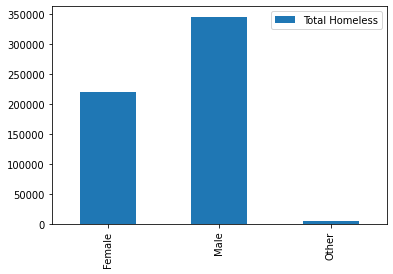

In [202]:
genders = df2020[["State","Overall Homeless - Female, 2020", "Overall Homeless - Male, 2020", "Overall Homeless - Transgender, 2020", "Overall Homeless - Gender Non-Conforming, 2020"]]
genders = genders.set_index("State")
genders = genders.astype(int)

female = genders["Overall Homeless - Female, 2020"].sum()
male = genders["Overall Homeless - Male, 2020"].sum()
other = genders["Overall Homeless - Transgender, 2020"].sum() + genders["Overall Homeless - Gender Non-Conforming, 2020"].sum()

gendersums = pd.DataFrame.from_dict({"Female":female,"Male":male,"Other":other},orient='index',columns=["Total Homeless"])
gendersums.plot.bar()

# Analysis Part 2: Regional Impacts
## Louisiana Findings

In [203]:
louisiana = df2020[2:3]
louisiana

,State,Average Temperature,Minimum Wage,1980,1984,1988,1992,1996,2000,2004,...,"Overall Homeless - Male, 2020","Overall Homeless - Transgender, 2020","Overall Homeless - Gender Non-Conforming, 2020","Overall Homeless - Hispanic/Latino, 2020","Overall Homeless - White, 2020","Overall Homeless - Black or African American, 2020","Overall Homeless - Asian, 2020","Overall Homeless - American Indian or Alaska Native, 2020","Overall Homeless - Native Hawaiian or Other Pacific Islander, 2020","Overall Homeless - Multiple Races, 2020"
2,Louisiana,66.4,7.25,R,R,R,D,D,R,R,...,2192,11,3,88,1165,1908,21,29,5,45


### Homeless By State Temperature

In [204]:
homeless_temp = df2020[["Average Temperature","Overall Homeless, 2020"]]

Weak Positive Correlation

In [205]:
homeless_temp["Average Temperature"].corr(homeless_temp["Overall Homeless, 2020"])

0.13355500230412334

<AxesSubplot:xlabel='Average Temperature', ylabel='Overall Homeless, 2020'>

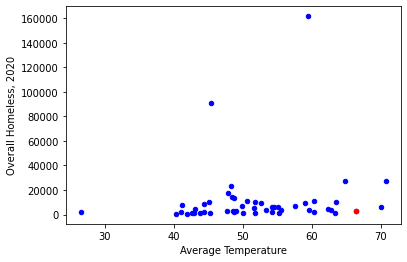

In [206]:
ax = homeless_temp.plot.scatter(x="Average Temperature", y = "Overall Homeless, 2020", c = "blue")
louisiana.plot.scatter(x="Average Temperature", y = "Overall Homeless, 2020", c = "red", ax = ax)

Red is Louisiana

### Homeless By State Minimum Wage

In [213]:
homeless_wage = df2020[["Minimum Wage","Overall Homeless, 2020"]]
homeless_wage["Minimum Wage"] = homeless_wage["Minimum Wage"].astype(float)
homeless_wage["Overall Homeless, 2020"] = homeless_wage["Overall Homeless, 2020"].astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Any idea how to remove the error messages above?

Moderate Positive Correlation

In [211]:
homeless_wage["Minimum Wage"].corr(homeless_wage["Overall Homeless, 2020"])

0.4141571132926049

Scatter Chart

<AxesSubplot:xlabel='Minimum Wage', ylabel='Overall Homeless, 2020'>

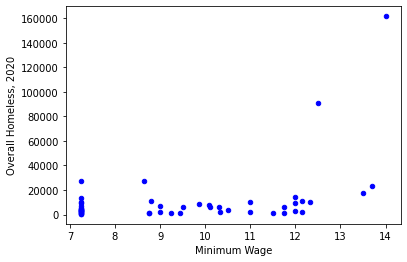

In [221]:
ax1 = homeless_wage.plot.scatter(x="Minimum Wage", y = "Overall Homeless, 2020", c = "blue")
louisiana.plot.scatter(x="Minimum Wage", y = "Overall Homeless, 2020", c = "red", ax = ax)

# Analysis Part 3: Future Predictions
See Next Steps Below

# Next Steps

1. Part 3 of our analysis is to create a predictive model to forecast the homeless population in 2021 and future years. We will create a linear regression model using homeless data over the last 40 years and regress it with the most correlated factors.

2. More charts and visuals will help analyze and present the findings and correlations between states, homeless population, and other factors. This will show which factors are the most correlated with state homelessness data. We will then present our findings and reccomendations in order to reduce homelessness.